<a href="https://colab.research.google.com/github/Alejandro-RL/RNA-Atividade-1.2/blob/main/RNA_Atividade1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais 
# Atividade 1.2

Adan Thierry Souza dos Santos - 1915080050 \
Alejandro da Rocha Loureiro - 1915080001 \
Fernando Araújo Alves Filho - 1915080063 \
Victor Brasil de Pina - 1915080079

# Imports e o arquivo em sí


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
!wget https://www.dropbox.com/s/ys5r54e6a5je0y0/Manaus.csv

In [ ]:
csv = pd.read_csv("/content/Manaus.csv", sep=';')

# Visão Geral dos Casos Confirmados


In [4]:
df = csv[csv['_classificacao'] == 'Confirmado']

# 1) Quantos atributos descrevem cada exemplo? Quais são eles?
(Feito usando o .columns para extrair as colunas, depois o .unique() para ver os valores, que estão em parênteses)

São 39 atributos, que estão listados a seguir:

* Datas de Evolução, Notifição e Sintomas da Doença 
* Classificação (Descartado, Confirmado, Em análise) 
* Conclusão (Recuperado, Óbito, Óbito por outras causas)
* Origem (SIVEP, GAL, eSUS VE) [???]
* Comorbidades, cada uma com uma coluna (Diabetes, Hemato, Hepatica, Imuno, Neurologica, Obessidade, Renal, Respiratoria)
* Critério (Laboratorial, Clínico, Clínico Epidemiológico, Clínico-Imagem)
* Etnia (Etnias Indígenas)
* Evolução (Internado, Internado em UTI, Em tratamento domiciliar)
* Idade
* Faixa Etária (< 1, 1-4, 5-9, 10-14, 15-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80 ou +)
* Gestante
* Profissional de Saúde
* Raça ([Parda, Branca, Preta, Amarela, Indigena, Ignorado)
* Se Notifição (valores numéricos inteiros) [???]
* Sexo (M, F, I)
* Sintomas, cada um com uma coluna (Dispneia, Febre, Garganta,Tosse, Outros)
* SRAG (Síndrome Respiratória Aguda, os valores são os vírus que causam isso, incluindo a covid-19) [???]
* Testes, cada um com uma coluna (Anticorpo, Antígeno, PCR)
* Localização, cada um com uma coluna (Bairro, Bairro_Mapa, Distrito)
* Taxa (valores numéricos fracionados) [???]

In [5]:
df.columns

Index(['_dt_evolucao', '_dt_notificacao', '_dt_sintomas', '_classificacao',
       '_conclusao', '_origem', '_comorb_cardio', '_comorb_cromossomica',
       '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica',
       '_comorb_imuno', '_comorb_neurologica', '_comorb_obessidade',
       '_comorb_renal', '_comorb_respiratoria', '_criterio', '_etnia',
       '_evolução', '_idade', '_faixa etária', '_gestante', '_profiss_saude',
       '_raca', '_se_notificacao', '_sexo', '_sintoma_dispneia',
       '_sintoma_febre', '_sintoma_garganta', '_sintoma_tosse',
       '_sintoma_outros', '_srag', '_teste_anticorpo', '_teste_antigeno',
       '_teste_pcr', '_bairro', '_bairro_mapa', '_distrito', '_taxa'],
      dtype='object')

In [6]:
len(df.columns)

39



---



# 2) Quantos casos confirmados há em Manaus, cumulativamente?

80420 casos

In [7]:
len(df)

80420



---



#3) A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

*   Registro mais antigo: 16 de Fevereiro, 2020
*   Registro mais recente: 29 de Dezembro, 2020

In [8]:
#Extraindo as datas
datas = [i for i in df['_dt_notificacao']]
#Retirando a hora já que são todas iguais
datas = [str(i).strip("00:00") for i in datas]
#datas agora uma lista onde cada elemento é do tipo [dd/mm/aaaa]
datas = [i.split('/') for i in datas]

#Transformando os valores da lista datas no tipo datetime
#Colocando os resultados na lista datas1
datas1 = []
for i in datas:
  #Filtrando as datas vazias
  if("nan" not in i):
    ano = int(i[2])
    mes = int(i[1])
    dia = int(i[0])
    datas1.append(datetime.datetime(ano, mes, dia)) 

#Agora basta usar o sort
datas1 = sorted(datas1)
print("Em mm/dd/aa")
print("Primeira data no registro: "+datas1[0].strftime("%x"))
print("Última data no registro: "+datas1[-1].strftime("%x"))

Em mm/dd/aa
Primeira data no registro: 02/16/20
Última data no registro: 12/29/20




---



# Limpeza dos Dados
* Excluindo todos os atributos relativos
às comorbidades, sintomas, etnia, profissão, outras datas que não a de notificação, origem e outros
que não estiverem envolvidos no contexto do trabalho solicitado.
* Excluindo todas as linhas em que houver dados faltantes para os atributos remanescentes.


In [9]:
#Uma cópia de df com as características relevantes
df1 = df[['_dt_notificacao', '_classificacao','_conclusao', '_idade',
         '_faixa etária', '_sexo','_teste_anticorpo', '_teste_antigeno',
       '_teste_pcr', '_bairro', '_bairro_mapa', '_distrito']]

In [ ]:
#retirando as linhas com os dados faltantes
#No caso das 3 colunas sobre testes, pelo menos 1 terá valor
#Se as 3 estiverem vazias, descarte.
colunas_1 = ['_dt_notificacao', '_classificacao','_conclusao', '_idade',
         '_faixa etária', '_sexo','_bairro', '_bairro_mapa', '_distrito']
for i in colunas_1:
  df1.dropna(subset=[i], inplace=True)

lista_null1 = df1['_teste_anticorpo'].isnull()
lista_null2 = df1['_teste_antigeno'].isnull()
lista_null3 = df1['_teste_pcr'].isnull()

for i in df1.index:
  if(lista_null1[i] and lista_null2[i] and lista_null3[i]):
    df1.drop(index=i, inplace=True)

In [ ]:
#Adicionando uma coluna com datas no formato datetime para usos futuros
datas = [i for i in df1['_dt_notificacao']]
datas = [str(i).strip("00:00") for i in datas]
datas = [i.split('/') for i in datas]

datas1 = []
for i in datas:
  ano = int(i[2])
  mes = int(i[1])
  dia = int(i[0])
  datas1.append(datetime.datetime(ano, mes, dia))

df1['datetime'] = datas1

# 1) Quantos exemplos e atributos há na base de dados após a limpeza e organização?
37.032 Exemplos,
12 Atributos

In [12]:
print(len(df1),len(df1.columns))

37032 13


# 2) Qual a porcentagem de indivíduos recuperados em relação ao todo?
R = 95.5822%

In [13]:
recuperados = df1[df1['_conclusao']=='Recuperado']
porcentagem_recuperados = (len(recuperados)/len(df1))*100
print(porcentagem_recuperados)

95.58219917908836


# 3)Os casos acometeram mais indivíduos do sexo masculino ou feminino?
R = Mais indivíduos do sexo feminino (20302 > 16730)

In [14]:
m = df1[df1['_sexo']=='M']
f = df1[df1['_sexo']=='F']
print(len(m),len(f))

16730 20302


# 4)Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?
<p>Média: 42.08</p>
<p>Desvio padrão: 16.24</p>

<p>Individuo mais jovem: 0<p/>
<p>Individuo mais idoso = 120</p> 

In [55]:
valor = df1['_idade']
count = 0
for i in range(len(valor) - 1):
  count += valor[i]
  if i == 0:
    jovem = valor[i]
    velho = valor[i]
  else:
    if valor[i] > velho:
      velho = valor[i]
    if valor[i] < jovem:
      jovem = valor[i]

media = count/len(valor)

count = 0
for i in range(len(valor) - 1):
  count += (valor[i] - media)**2

aux = count/len(valor)
desvioP = (aux)**(0.5)

print("A média é: %.2f" %media)
print("O desvio padrão é: %.2f" %desvioP)
print("Idade do paciente mais novo:",int(jovem))
print("Idade do paciente mais velho:",int(velho))

A média é: 42.08
O desvio padrão é: 16.24
Idade do paciente mais novo: 0
Idade do paciente mais velho: 120


In [15]:
df1['_idade'].describe()

count    37032.000000
mean        42.078716
std         16.241903
min          0.000000
25%         32.000000
50%         41.000000
75%         52.000000
max        120.000000
Name: _idade, dtype: float64

# 5)O bairro com maior incidência de casos
<p>Bairro: SÃO JOSÉ OPERÁRIO possui: 2192 casos</p>

 Coletando bairros com mais casos:


In [16]:
casos = {}
for bairro in df1['_bairro_mapa'].unique():
  casos[bairro] = df1[df1['_bairro_mapa'] == bairro].count()[-1]
maiscasos = sorted(casos, key = casos.get, reverse= True)

maiscasos é uma lista que armazena em ordem decrescente as chaves dos bairros com mais casos\
para consultar é só fazer: 


```
#Bairro nº 1 em casos
i = 0
casos[maiscasos[i]]
```



In [17]:
for i in range(3): 
  print(f"{i+1}º: Bairro: "+ str(maiscasos[i])+" possui: " + str(casos[maiscasos[i]]) + " casos")

1º: Bairro: SÃO JOSÉ OPERÁRIO possui: 2192 casos
2º: Bairro: CIDADE NOVA possui: 2017 casos
3º: Bairro: ALVORADA possui: 1840 casos


<h1>6)Os 3 bairros com mais casos confirmados foram:</h1>
<p>1º: Bairro: SÃO JOSÉ OPERÁRIO possui: 2192 casos
<p>2º: Bairro: CIDADE NOVA possui: 2017 casos
<p>3º: Bairro: ALVORADA possui: 1840 casos

In [ ]:
#As questões abaixo foram feitos com o dataframe já exportado, se usar o df1
#nativo dessa instância, não vão funcionar por causa de uma mudança que acontece
#nos índices
!wget https://www.dropbox.com/s/afsryaw3qt0oaw6/arquivo_processado%281%29.csv
df1 = pd.read_csv("/content/arquivo_processado(1).csv")

# 7) Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.
São 3 tipos de teste: Anticorpo, Antígeno e PCR. Nesses dados, os exemplos possuem pelo menos um teste.\
Os dados apresentam valores inteiros para os testes feitos, e 'nan' caso não tenha feito um teste.

Quantidade:\
Anticorpo: 25962\
Antígeno: 4053\
PCR: 11798

Porcentagem:\
Anticorpo: 70.11%\
Antígeno: 10.94%\
PCR: 31.86%

In [93]:
df1['_teste_anticorpo'].fillna(0, inplace=True)
num_anticorpo = len(df1[df1['_teste_anticorpo'] != 0])

df1['_teste_antigeno'].fillna(0, inplace=True)
num_antigeno = len(df1[df1['_teste_antigeno'] != 0])

df1['_teste_pcr'].fillna(0, inplace=True)
num_pcr = len(df1[df1['_teste_pcr'] != 0])

#Quantidade, Porcentagem
print("Anticorpo: "+ str(num_anticorpo)+', '+str((num_anticorpo/len(df1))*100)+'%')
print("Antígeno: "+ str(num_antigeno)+', '+str((num_antigeno/len(df1))*100)+'%')
print("PCR: "+ str(num_pcr)+', '+str((num_pcr/len(df1))*100)+'%')

Anticorpo: 25962, 70.10693454309786%
Antígeno: 4053, 10.944588464031108%
PCR: 11798, 31.858932814862822%


# 8) Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos;
A taxa de letalidade, em porcentagem, é de 4.33% de casos de obito

In [56]:
conc = df1['_conclusao']

count = 0
for i in range(len(conc) - 1):
  if conc[i] == "Óbito":
    count += 1

taxa = count/len(conc)

percentual = taxa * 100
print("A taxa de letalidade, em porcentagem, é de %.2f" %percentual + "% de casos de obito")

A taxa de letalidade, em porcentagem, é de 4.33% de casos de obito


# 9)Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunta, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.

O valor obitido foi: -0.355 \
Como o valor é negativo, são inversamente proporcionais, ou seja, se uma aumenta, a outra diminui, e o valor entre 0.3 e 0.5 é uma correlação fraca.

In [53]:
#Organizando os dados para cada faixa etária:
df2=df1.groupby(['_idade']).size().reset_index(name='count')
df2.sort_values(by='_idade')
frequencia=[0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(df2['_idade'])):
  if df2['_idade'][i]<10:
    frequencia[0]=+df2['count'][i]
  if df2['_idade'][i]<20:
    frequencia[1]=+df2['count'][i]
  if df2['_idade'][i]<30:
    frequencia[2]=+df2['count'][i]
  if df2['_idade'][i]<40:
    frequencia[3]=+df2['count'][i]
  if df2['_idade'][i]<50:
    frequencia[4]=+df2['count'][i]
  if df2['_idade'][i]<60:
    frequencia[5]=+df2['count'][i]
  if df2['_idade'][i]<70:
    frequencia[6]=+df2['count'][i]
  if df2['_idade'][i]<80:
    frequencia[7]=+df2['count'][i]
  if df2['_idade'][i]<90:
    frequencia[8]=+df2['count'][i]
  if df2['_idade'][i]<100:
    frequencia[9]=+df2['count'][i]
  if df2['_idade'][i]<110:
    frequencia[10]=+df2['count'][i]
  if df2['_idade'][i]<120:
    frequencia[11]=+df2['count'][i]
  if df2['_idade'][i]<130:
    frequencia[12]=+df2['count'][i]

#Correlação de Pearson
print('Correlação de Pearson:')
df2['_idade'].corr(df2['count'],method='pearson')

Correlação de Pearson:


-0.355550186574691

# Visualização de Dados

# 1)Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual.

Text(0, 0.5, 'Porcentagem do número de casos')

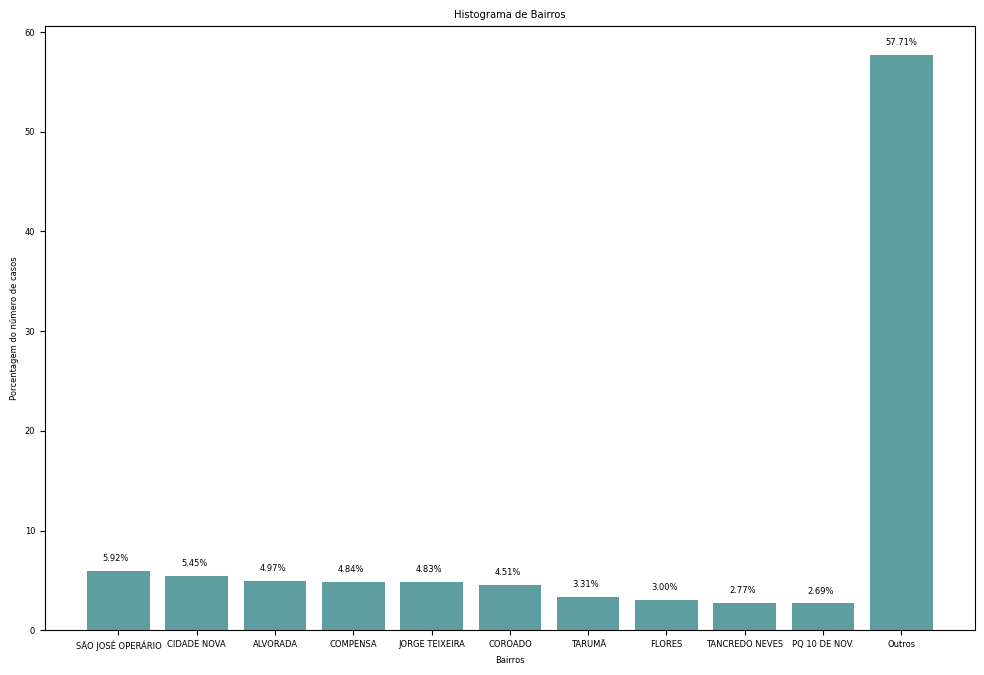

In [28]:
histograma_bairros = []

for i in range(len(maiscasos)):
  if(i < 10):
    histograma_bairros.append([maiscasos[i],casos[maiscasos[i]]])
  elif(i == 10):
    histograma_bairros.append(["Outros",casos[maiscasos[i]]])
  else:
    histograma_bairros[10][1] += casos[maiscasos[i]]

#Encurtando o nome para melhor visualização no gráfico
histograma_bairros[9][0] = 'PQ 10 DE NOV.'

#Convertendo para porcentagem e colocando em listas para usar no gráfico:
names = []
values = []
for i in histograma_bairros:
  i[1] = (i[1]/len(df1))*100
  names.append(i[0])
  values.append(i[1])


#O gráfico em sí
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 6})


plt.bar(names, values, color='cadetblue')

for i,v in enumerate(values):
  plt.text(x=i-0.2,y=v+1, s='{:.2f}%'.format(v), color = 'black')

plt.title("Histograma de Bairros")
plt.xlabel('Bairros')
plt.ylabel("Porcentagem do número de casos")

# 2)Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?
Sim, há outliers, estão marcados como círculos nos gráficos abaixo. 
Em específico, no gráfico do sexo feminino, há 2 pontos na faixa de 120 anos,sendo que a pessoa mais velha no Brasil tem 117 anos.

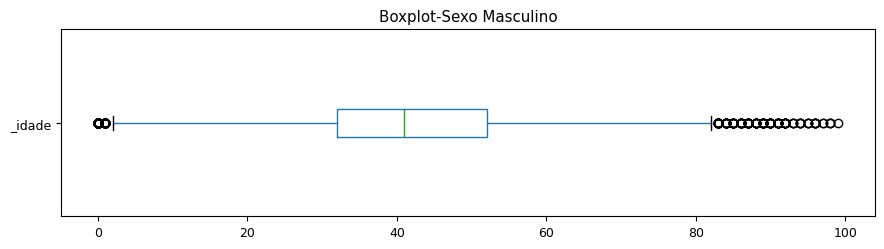

In [31]:
plt.rcParams.update({'font.size': 9})
m_idade = df1[df1['_sexo']=='M']['_idade']
f_idade = df1[df1['_sexo']=='F']['_idade']

m_idade.plot.box(title='Boxplot-Sexo Masculino',vert=False, figsize=(10.5, 2.475))

  

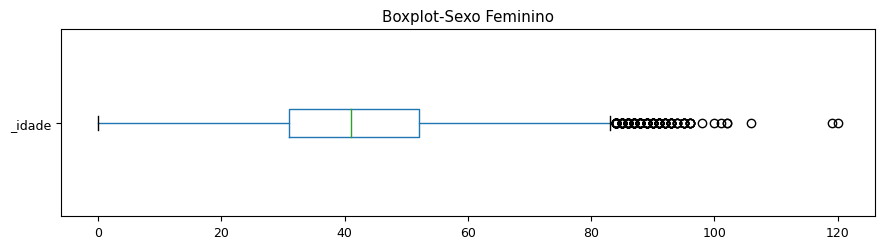

In [32]:
f_idade.plot.box(title='Boxplot-Sexo Feminino',vert=False, figsize=(10.5, 2.475))


# 3) Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;

<BarContainer object of 10 artists>

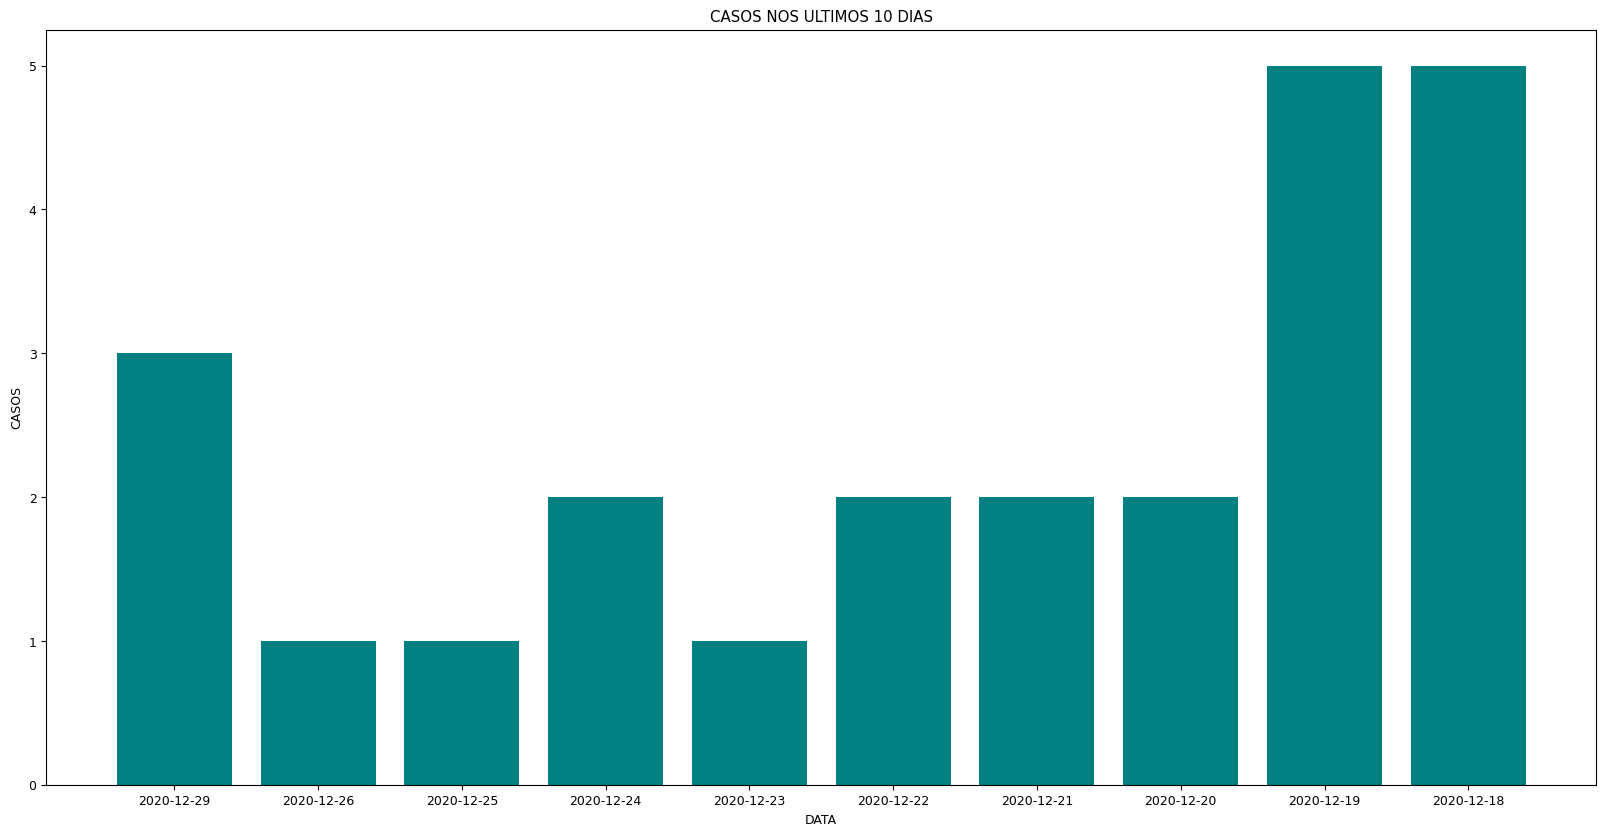

In [33]:

dfd = df1.sort_values(by='datetime')
y1 =  dfd['datetime'].unique()[-1:-11:-1]
x1 =[]
for i in y1:
  x1.append([dfd[dfd['datetime'] == i].count()[0]][0])
plt.figure(figsize=(20,10))
plt.title('CASOS NOS ULTIMOS 10 DIAS')
plt.xlabel('DATA')
plt.ylabel('CASOS')
colors_b = ['aqua', 'cyan', 'teal', 'darkcyan', 'cadetblue', 'powderblue',
          'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue']
plt.bar(y1, x1, color = 'teal')

# 4) Repita o gráfico anterior considerando o número de casos recuperados

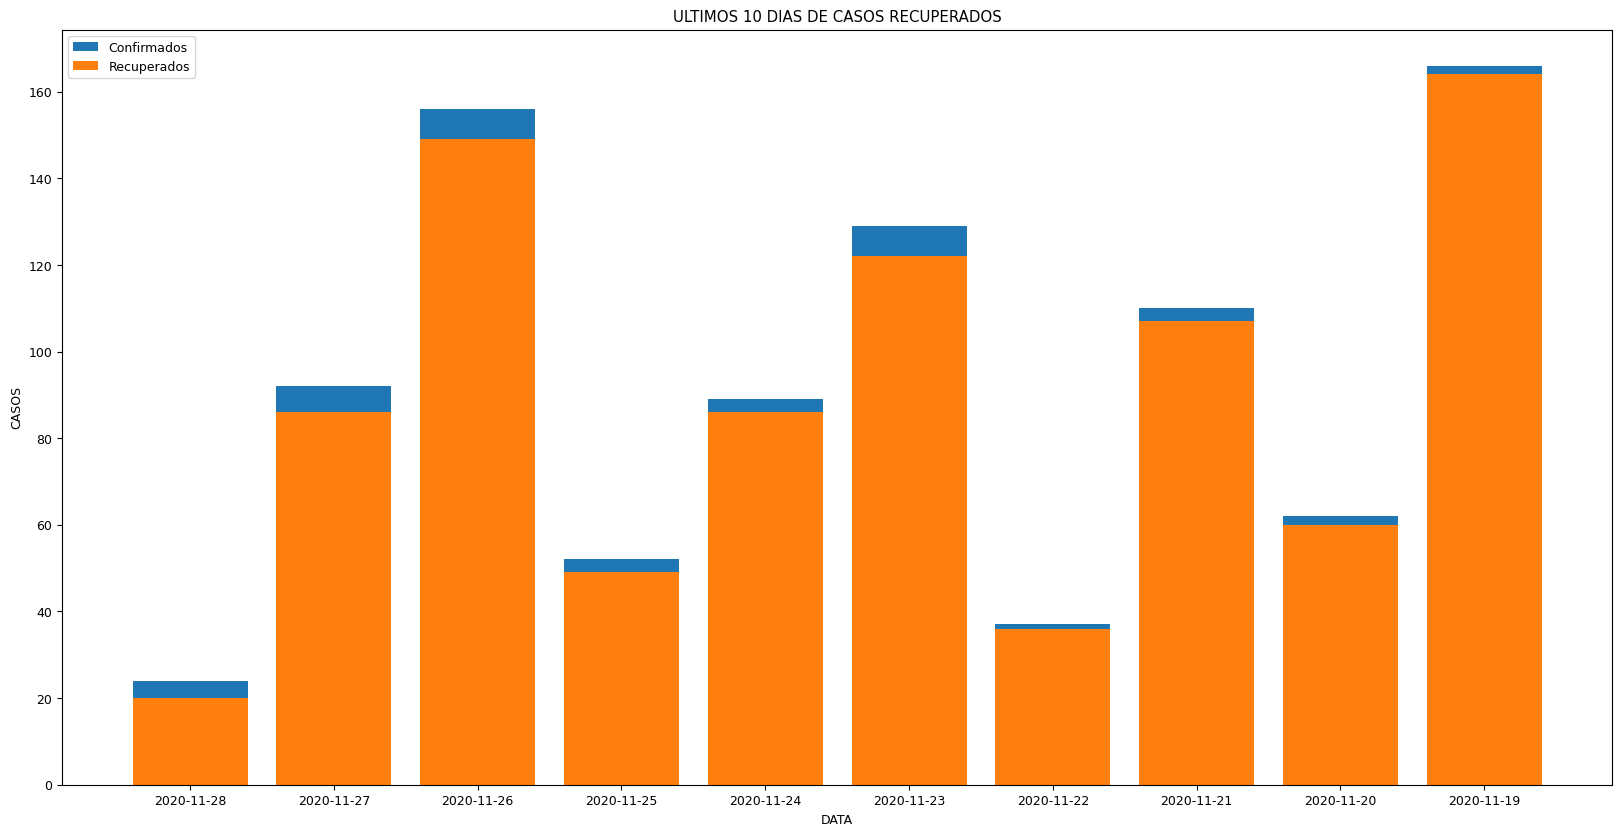

In [34]:
dfd = df1.sort_values(by='datetime')
dfd = dfd[dfd['_conclusao'] == 'Recuperado']
y1 =  dfd['datetime'].unique()[-1:-11:-1]
x1 =[]
x2 = []
y2 = y1.copy()

for i in y1:
  x1.append([dfd[dfd['datetime'] == i].count()[0]][0])
  x2.append([df1[df1['datetime'] == i].count()[0]][0])
  
plt.figure(figsize=(20,10))

plt.title('ULTIMOS 10 DIAS DE CASOS RECUPERADOS')
plt.xlabel('DATA')
plt.ylabel('CASOS')

plt.bar(y2, x2, label = 'Confirmados')
plt.bar(y1, x1, label ='Recuperados')

plt.legend()
plt.show()

# 5)Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);

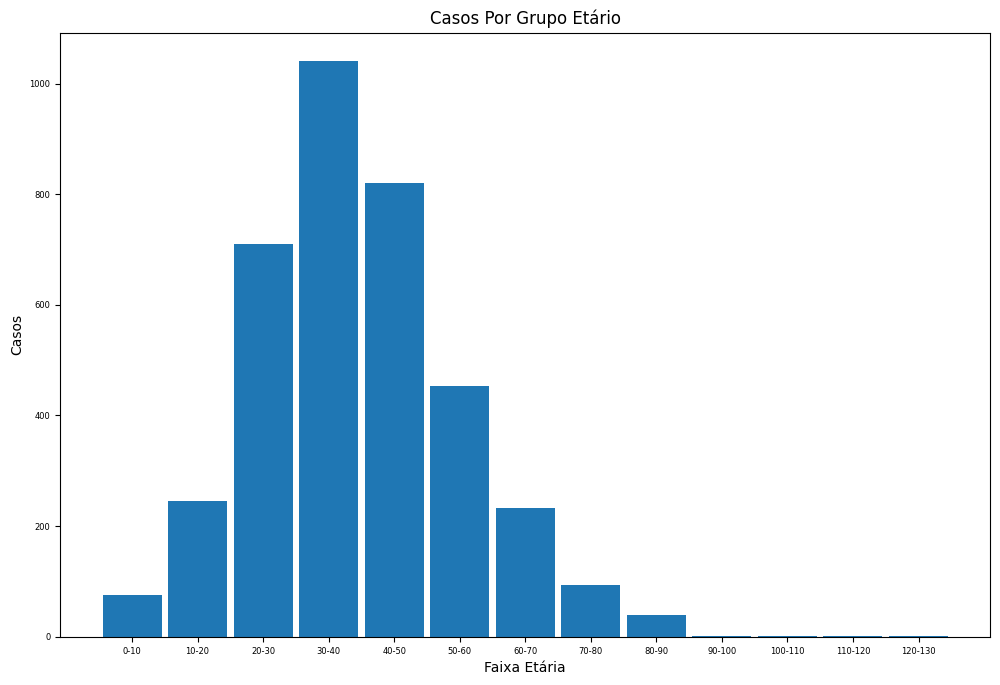

In [50]:

# Criando o gráfico:
label_y=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130']
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 6})
fig, ax = plt.subplots()
ax.set_ylabel('Casos',fontsize=10)
ax.set_xlabel('Faixa Etária',fontsize=10)
plt.title('Casos Por Grupo Etário',fontsize=12)
for i in range(len(frequencia)):
  plt.bar( label_y[i],frequencia[i],width=0.9,color='tab:blue')

#6)Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

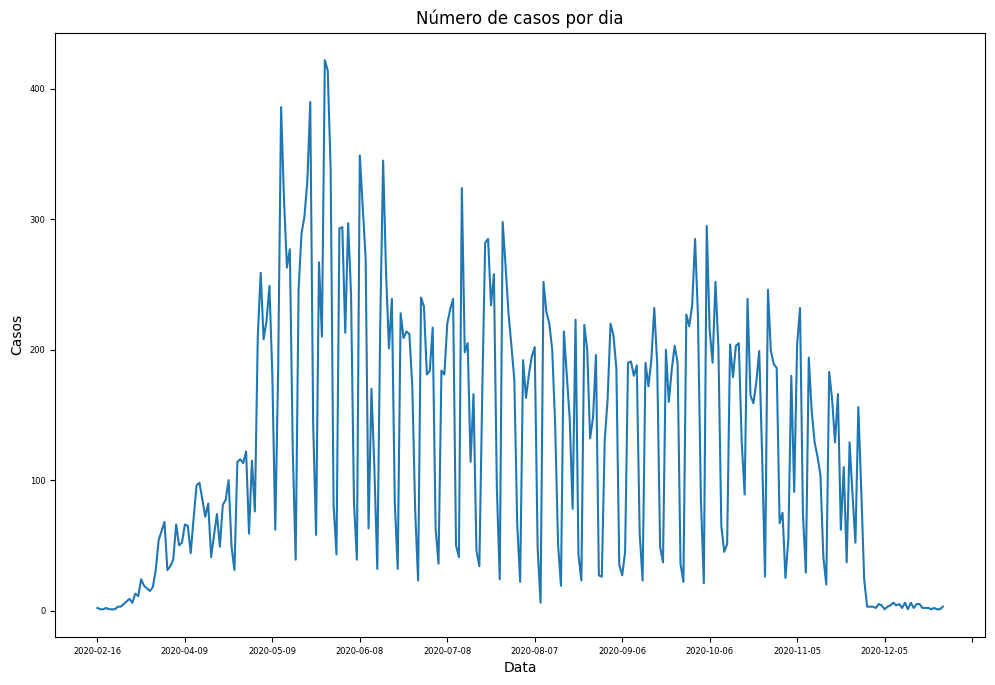

In [51]:
df2=df1.groupby(['datetime']).size().reset_index(name='count')
df2=df2.sort_values(by='datetime')
fig, ax = plt.subplots()
ax.set_ylabel('Casos',fontsize=10)
ax.set_xlabel('Data',fontsize=10)
ax.plot(df2['datetime'],df2['count'])
loc = matplotlib.ticker.MultipleLocator(base=30)
plt.title('Número de casos por dia',fontsize=12)
ax.xaxis.set_major_locator(loc)
plt.show()

<BarContainer object of 291 artists>

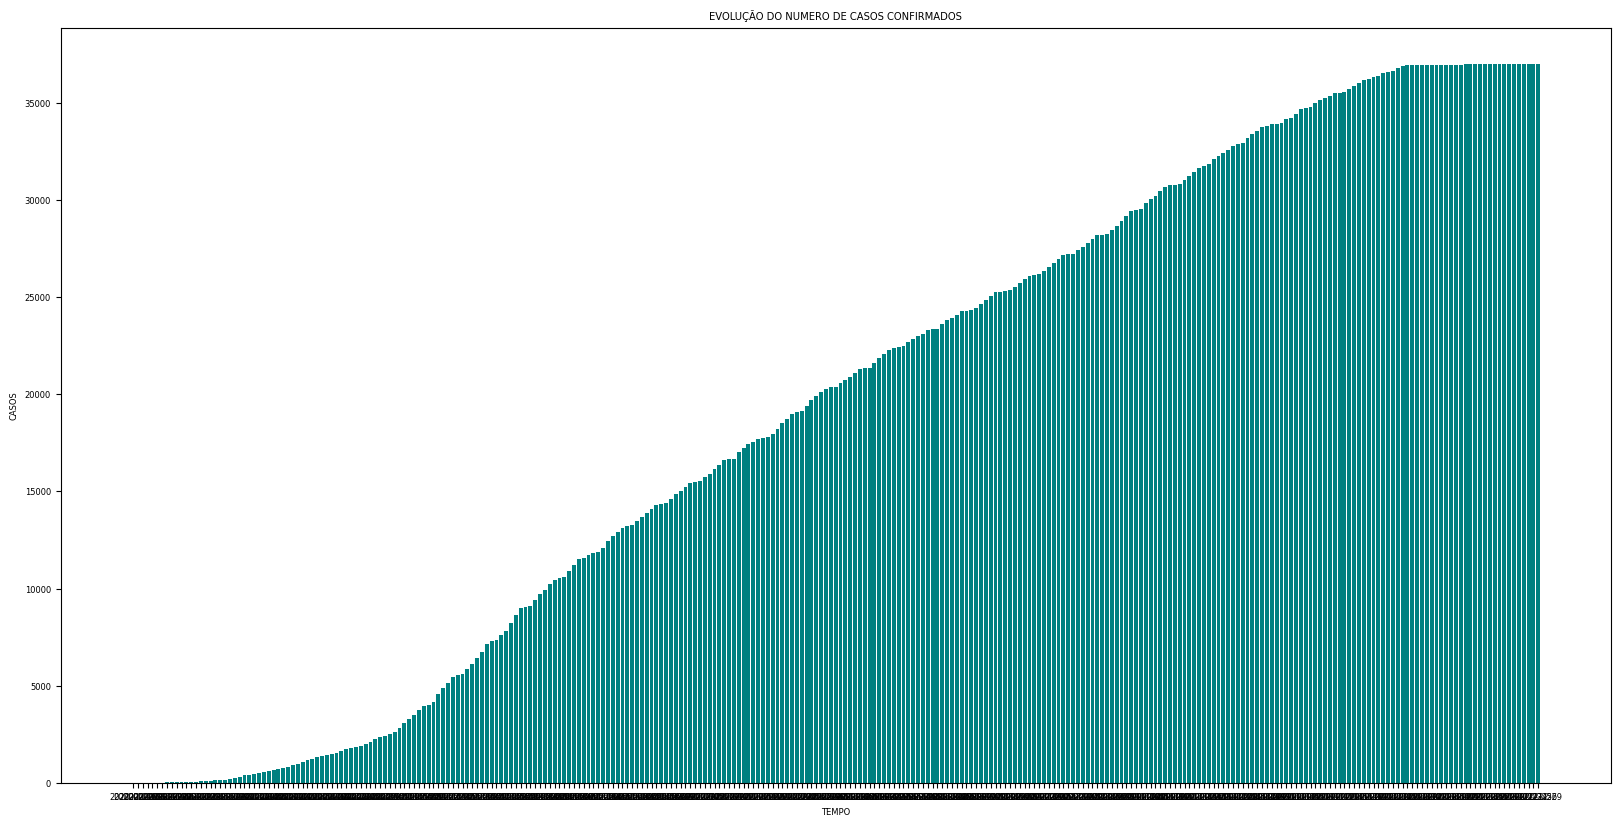

In [94]:
dfd = df1.sort_values(by='datetime')
y1 =  dfd['datetime'].unique()
x1 =[]
j = 0
for i in y1:
  x1.append([dfd[dfd['datetime'] == i].count()[0]][0] + j)
  j = [dfd[dfd['datetime'] == i].count()[0]][0] + j

plt.figure(figsize=(20,10))
plt.title('EVOLUÇÃO DO NUMERO DE CASOS CONFIRMADOS')
plt.xlabel('TEMPO')
plt.ylabel('CASOS')
colors_b = ['aqua', 'cyan', 'teal', 'darkcyan', 'cadetblue', 'powderblue',
          'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue']
plt.bar(y1, x1, color = 'teal')

#7)Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?
De acordo com o gráfico abaixo, percebe-se a tendência de casos entre 30 e 50 anos. Isso confirma que apesar de idosos serem os mais vulneráveis e muitas vezes liderando os números de mortos, tiveram bem menos casos confirmados em relação aos adultos. 

Também podemos inferir que essa mesma faixa-etária foi a meior responsável pela transmissão do vírus.

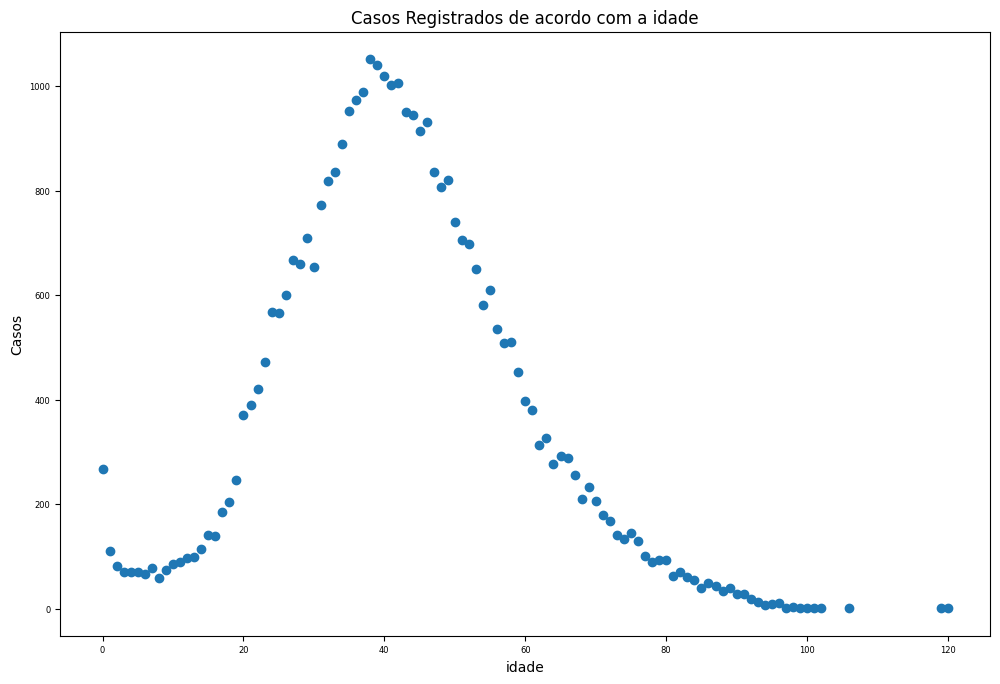

In [37]:
df2=df1.groupby(['_idade']).size().reset_index(name='count')
df2.sort_values(by='_idade')
fig, ax = plt.subplots()
ax.set_ylabel('Casos',fontsize=10)
ax.set_xlabel('idade',fontsize=10)
plt.scatter(df2['_idade'],df2['count'])
plt.title('Casos Registrados de acordo com a idade',fontsize=12)
plt.show()

# 2.3 - Tipos de Tarefas

# 1) Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?

Como tarefa de classificação, tem-se um classificador que possa determinar se um paciente possui COVID-19 em relação ao tipo teste feito e a eficácia dele, para o caso de divergência entre resultados dos testes onde um confirma que o paciente é portdor do vírus e o outro nega. Essa tarefa necessitaria da relação de casos confirmados e a qual teste foi submetido, verificando a correspondência de cada um dos vetores para validá-lo.

# 2) Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?

Em relação a tarefa de regressão, tem a tarefa de identificar as chances em porcentagem do paciente confirmado de se recuperar da doença em relação a sua idade, tento como preditores a sua classificação, pois é necessário o paciente estar doente, sua idade e faixa etária. Assim, pode-se ter os dados de pacientes que sobreviveram ao COVID-19 em relação dos que foram a óbito.